# Cài đặt các thư viện

In [1]:
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install osmnet
!pip install matplotlib==3.4.3
!pip install osmnet
!pip install pandana
!pip install folium

     |████████████████████████████████| 994 kB 2.0 MB/s 
     |████████████████████████████████| 6.3 MB 53.0 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 994 kB 3.9 MB/s 
     |████████████████████████████████| 10.3 MB 2.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 1.7 MB 4.1 MB/s 


# Clone project CSL: https://github.com/CityScope/CSL_HCMC

In [1]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 176.98 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


# Load dữ liệu dân số theo quận
 Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp

In [2]:
import geopandas as gpd
population_df = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [3]:
population_df['percentage'] = population_df['Pop_2019'] / population_df['Pop_2017']
top10Percentage = population_df.nlargest(10,'percentage')
top10Percentage

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,percentage
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,296198.0,310739.0,397006.0,2242.76,2306.020,2376.490,2419.330,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,434275.0,446056.0,542243.0,3197.13,3284.830,3356.840,3634.000,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,156001.0,177990.0,206837.0,1005.81,1032.870,1104.170,1188.340,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,526064.0,549064.0,620146.0,7680.92,8092.530,8638.210,9016.090,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,153832.0,161957.0,180275.0,2953.46,2815.910,2758.400,2685.950,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,410984.0,418655.0,462047.0,789.36,818.498,841.402,878.246,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.060,7616.070,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.550,10028.200,10487.800,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.420,1856.300,1944.790,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.700,11880.800,12310.500,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


# Lọc lại những quận/huyện có tốc độ tăng trưởng dân số nhanh nhất theo tiêu chí Pop2019/Pop2017

In [4]:
top10Percentage_crs = top10Percentage.to_crs(epsg=32648)
top10Percentage_crs

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,percentage
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,296198.0,310739.0,397006.0,2242.76,2306.020,2376.490,2419.330,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,434275.0,446056.0,542243.0,3197.13,3284.830,3356.840,3634.000,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,156001.0,177990.0,206837.0,1005.81,1032.870,1104.170,1188.340,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,526064.0,549064.0,620146.0,7680.92,8092.530,8638.210,9016.090,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,153832.0,161957.0,180275.0,2953.46,2815.910,2758.400,2685.950,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,410984.0,418655.0,462047.0,789.36,818.498,841.402,878.246,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.060,7616.070,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.550,10028.200,10487.800,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.420,1856.300,1944.790,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.700,11880.800,12310.500,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


# Load dữ liệu click của người dùng và convert về hệ tọa độ giống với hệ tọa độ của dữ liệu quận huyện (.to_crs)

In [6]:
response3 = gpd.read_file('response3.json')
response3

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


In [7]:
clicks = response3.to_crs(epsg=32648)
clicks

,dbh,geometry
0,1,POINT (687074.226 1200044.747)
1,1,POINT (687752.360 1188252.815)
2,1,POINT (681813.990 1197998.313)
3,1,POINT (681761.573 1198052.679)
4,1,POINT (681442.508 1198483.069)
...,...,...
83670,1,POINT (681095.997 1199156.208)
83671,1,POINT (691495.565 1200249.907)
83672,1,POINT (689394.818 1186828.972)
83673,1,POINT (683268.233 1197009.824)


In [8]:
districts = top10Percentage_crs
districts

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,percentage
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,296198.0,310739.0,397006.0,2242.76,2306.020,2376.490,2419.330,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,434275.0,446056.0,542243.0,3197.13,3284.830,3356.840,3634.000,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,156001.0,177990.0,206837.0,1005.81,1032.870,1104.170,1188.340,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,526064.0,549064.0,620146.0,7680.92,8092.530,8638.210,9016.090,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,153832.0,161957.0,180275.0,2953.46,2815.910,2758.400,2685.950,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,410984.0,418655.0,462047.0,789.36,818.498,841.402,878.246,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.060,7616.070,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.550,10028.200,10487.800,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.420,1856.300,1944.790,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.700,11880.800,12310.500,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


# Lọc lại những click theo top 10 quận/huyện có dân số tăng nhanh nhất

In [9]:
res = gpd.sjoin(clicks, districts, how='left', op='within')
columns = ['dbh', 'Dist_Name', 'Dist_ID', 'Pop_2017', 'Pop_2019', 'geometry', 'percentage' ]
res = res[columns]
res = res[res['percentage'] >= 0] # lọc NaN
res

,dbh,Dist_Name,Dist_ID,Pop_2017,Pop_2019,geometry,percentage
0,1,Thu Duc,762,542612.0,592686.0,POINT (687074.226 1200044.747),1.092283
1,1,District 7,778,327223.0,360155.0,POINT (687752.360 1188252.815),1.100641
5,1,Thu Duc,762,542612.0,592686.0,POINT (691440.136 1200531.193),1.092283
8,1,District 7,778,327223.0,360155.0,POINT (689464.643 1188780.763),1.100641
9,1,District 7,778,327223.0,360155.0,POINT (689796.719 1186376.959),1.100641
...,...,...,...,...,...,...,...
83667,1,Thu Duc,762,542612.0,592686.0,POINT (692728.451 1199608.364),1.092283
83668,1,District 7,778,327223.0,360155.0,POINT (686386.722 1188157.561),1.100641
83669,1,District 7,778,327223.0,360155.0,POINT (687023.738 1187921.071),1.100641
83671,1,Thu Duc,762,542612.0,592686.0,POINT (691495.565 1200249.907),1.092283


Dùng spatial join (sjoin) để kết bảng clicks và districts lại với nhau. Sau đó lọc lại top  10 quận/huyện có tốc độ tăng dân số nhanh nhất

In [10]:
top10_df2 = res.sort_values('percentage', ascending=False).drop_duplicates('percentage')
top10_df2

,dbh,Dist_Name,Dist_ID,Pop_2017,Pop_2019,geometry,percentage
61187,1,District 9,763,310739.0,397006.0,POINT (700374.950 1198770.525),1.277619
68742,1,Hoc Mon,784,446056.0,542243.0,POINT (674698.379 1198250.051),1.215639
64941,1,Nha Be,786,177990.0,206837.0,POINT (686570.546 1183754.241),1.162071
46806,1,District 12,761,549064.0,620146.0,POINT (687060.507 1200150.864),1.129460
82068,1,District 2,769,161957.0,180275.0,POINT (690989.291 1192056.380),1.113104
21800,1,Cu Chi,783,418655.0,462047.0,POINT (660486.357 1212237.489),1.103646
66892,1,District 7,778,327223.0,360155.0,POINT (690680.399 1187455.092),1.100641
73430,1,Thu Duc,762,542612.0,592686.0,POINT (691900.162 1201142.564),1.092283
71962,1,Binh Chanh,785,652900.0,705508.0,POINT (672476.161 1195107.758),1.080576
31957,1,Binh Tan,777,729366.0,784173.0,POINT (674973.920 1191921.642),1.075143


# Chạy thuật toán KMeans trên từng quận/huyện trong ở bước trước đó. K = 20


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
district_names = res['Dist_Name'].unique()
district_names

array(['Thu Duc', 'District 7', 'Hoc Mon', 'District 9', 'Cu Chi',
       'Nha Be', 'District 12', 'District 2', 'Binh Tan', 'Binh Chanh'],
      dtype=object)

In [13]:
list_district = []

for name in district_names:
  list_district.append(res[res['Dist_Name'] == name])

list_district

[       dbh Dist_Name  ...                        geometry  percentage
 0        1   Thu Duc  ...  POINT (687074.226 1200044.747)    1.092283
 5        1   Thu Duc  ...  POINT (691440.136 1200531.193)    1.092283
 11       1   Thu Duc  ...  POINT (691905.913 1199797.739)    1.092283
 12       1   Thu Duc  ...  POINT (691947.773 1199339.827)    1.092283
 13       1   Thu Duc  ...  POINT (691510.499 1200207.738)    1.092283
 ...    ...       ...  ...                             ...         ...
 83660    1   Thu Duc  ...  POINT (691787.241 1199296.626)    1.092283
 83661    1   Thu Duc  ...  POINT (692956.866 1199855.530)    1.092283
 83666    1   Thu Duc  ...  POINT (692150.603 1198299.366)    1.092283
 83667    1   Thu Duc  ...  POINT (692728.451 1199608.364)    1.092283
 83671    1   Thu Duc  ...  POINT (691495.565 1200249.907)    1.092283
 
 [21300 rows x 7 columns],
        dbh   Dist_Name  ...                        geometry  percentage
 1        1  District 7  ...  POINT (687752.36

In [14]:
list_point = []
for district in list_district:
    points = []
    for p in district['geometry']:
        points.append([p.x, p.y])
    points = np.array(points)
    list_point.append(points)

list_point

[array([[ 687074.22571664, 1200044.74667241],
        [ 691440.13626435, 1200531.19285159],
        [ 691905.91271803, 1199797.73899514],
        ...,
        [ 692150.60314608, 1198299.36588341],
        [ 692728.45140832, 1199608.36407597],
        [ 691495.56494721, 1200249.90688207]]),
 array([[ 687752.36045051, 1188252.81472442],
        [ 689464.64255059, 1188780.76277844],
        [ 689796.71916557, 1186376.95934085],
        ...,
        [ 686386.72182841, 1188157.5608487 ],
        [ 687023.73791901, 1187921.07079077],
        [ 689394.81796355, 1186828.97206016]]),
 array([[ 672111.26113773, 1206262.52576302],
        [ 671764.35730201, 1203022.58201661],
        [ 680460.83362177, 1205295.74527005],
        [ 675829.20831148, 1198649.14756262],
        [ 676435.16265768, 1201677.27328512],
        [ 675908.7953558 , 1202177.48270335],
        [ 667436.2732586 , 1206172.27122224],
        [ 674243.01244567, 1199667.18369488],
        [ 675102.1033898 , 1201610.15415164],
    

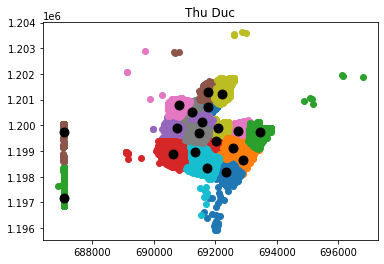

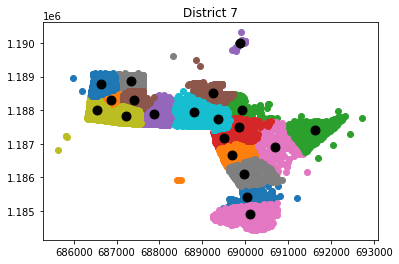

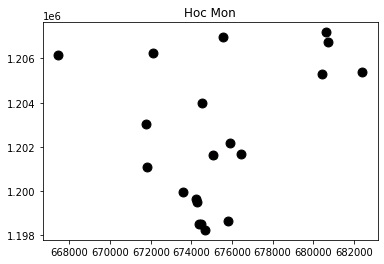

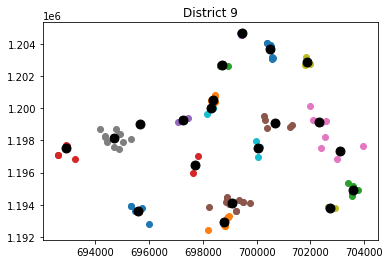

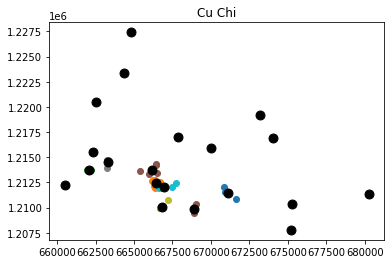

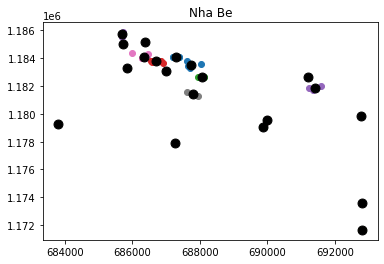

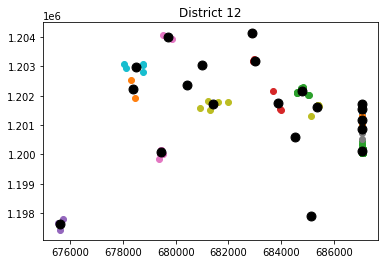

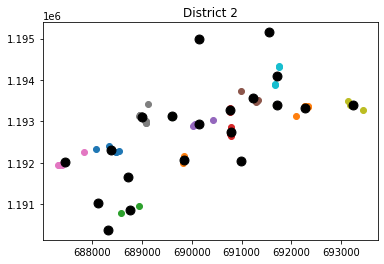

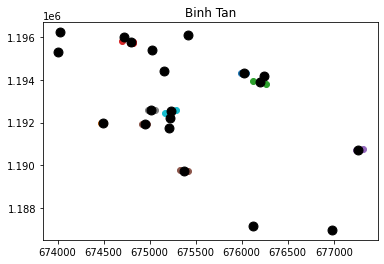

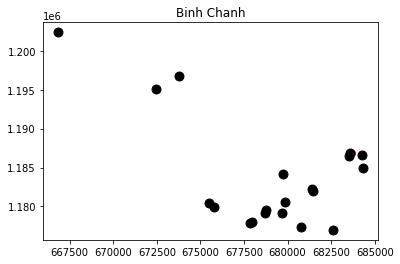

In [16]:
from sklearn.cluster import KMeans
KMeans_list = []
labels = []
for idx, district_name in enumerate(district_names):

    KMeans_list.append(KMeans(n_clusters=20, random_state=0).fit(list_point[idx]))
    labels.append(KMeans_list[idx].fit_predict(list_point[idx]))
    
    #Getting the Centroids
    plt.figure()
    plt.title(district_name)
    centroids = KMeans_list[idx].cluster_centers_
    u_labels = np.unique(labels[idx])
 
    #plotting the results:
    for i in u_labels:
        plt.scatter(list_point[idx][labels[idx] == i , 0] , list_point[idx][labels[idx] == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    # plt.legend()
    plt.show()
    print()

# Lấy ra những vị trí click nằm trong cluster có nhiều điểm nhất.

In [17]:
district_names

array(['Thu Duc', 'District 7', 'Hoc Mon', 'District 9', 'Cu Chi',
       'Nha Be', 'District 12', 'District 2', 'Binh Tan', 'Binh Chanh'],
      dtype=object)

In [18]:
import collections
list_cluster_points = []
for idx, district_name in enumerate(district_names):
    count = collections.Counter((KMeans_list[idx].labels_))
    max_key = max(count, key=count.get)
    max_cluster_points = list_district[idx][KMeans_list[idx].labels_ == max_key]
    list_cluster_points.append(max_cluster_points)

list_cluster_points

[       dbh Dist_Name  ...                        geometry  percentage
 53       1   Thu Duc  ...  POINT (692561.344 1199927.446)    1.092283
 70       1   Thu Duc  ...  POINT (692957.733 1200009.629)    1.092283
 134      1   Thu Duc  ...  POINT (692664.730 1199930.396)    1.092283
 157      1   Thu Duc  ...  POINT (693095.967 1199866.183)    1.092283
 204      1   Thu Duc  ...  POINT (692813.119 1199853.611)    1.092283
 ...    ...       ...  ...                             ...         ...
 83592    1   Thu Duc  ...  POINT (692531.436 1199946.202)    1.092283
 83636    1   Thu Duc  ...  POINT (693112.329 1200104.136)    1.092283
 83648    1   Thu Duc  ...  POINT (692751.394 1199697.622)    1.092283
 83661    1   Thu Duc  ...  POINT (692956.866 1199855.530)    1.092283
 83667    1   Thu Duc  ...  POINT (692728.451 1199608.364)    1.092283
 
 [1545 rows x 7 columns],
        dbh   Dist_Name  ...                        geometry  percentage
 8        1  District 7  ...  POINT (689464.643

In [19]:
list_cluster_points_crs = []
all_clusters = []

for item in list_cluster_points:
  list_cluster_points_crs.append(item.to_crs(epsg=4326))

for item in list_cluster_points_crs:
  array_lst = [[geom.xy[1][0], geom.xy[0][0]] for geom in item.geometry]
  all_clusters.append(array_lst)

# Vẽ các điểm được quan tâm nhiều nhất theo từng quận ở bước 8 lên trên bản đồ dưới dạng Heatmap

In [20]:
import folium
m = folium.Map(location=[10.8, 107], zoom_start=10, tiles='CartoDB positron')

In [21]:
all_clusters

[[[10.849784545378398, 106.761528925315],
  [10.8505066974432, 106.765158206245],
  [10.849805799893401, 106.762474530393],
  [10.849202726071198, 106.76641472800702],
  [10.8491039061526, 106.763827459638],
  [10.849847056473498, 106.76262914666],
  [10.8457833803891, 106.765671120972],
  [10.846762595655697, 106.765220161457],
  [10.846806303453198, 106.762378488016],
  [10.849599617223602, 106.763347268604],
  [10.848840910173802, 106.765232775429],
  [10.8496971147621, 106.763360879659],
  [10.851213521284, 106.763037301798],
  [10.848226601147202, 106.760765203155],
  [10.850650759229898, 106.765881838621],
  [10.851052720054698, 106.765760235819],
  [10.848552973124399, 106.760358154079],
  [10.8467897702232, 106.764284666147],
  [10.847361717077801, 106.762724692478],
  [10.846899556816998, 106.764711502649],
  [10.8469899867548, 106.764524285927],
  [10.8479023946478, 106.763304479421],
  [10.8461474745118, 106.762127446408],
  [10.8471242267607, 106.760277725114],
  [10.849859

In [22]:
from folium.plugins import HeatMap
for i in range(len(list_district)):
    HeatMap(all_clusters[i]).add_to(m)
m

# Lưu lại ảnh bản đồ heatmap dưới dạng file PNG

Cài đặt chromium-chromedriver

In [23]:
!apt-get update 
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [

In [26]:
m.save("heatmap.html")
import os
import time
!pip install selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
""""
    https://github.com/python-visualization/folium/issues/35
"""
delay=5
fn='heatmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

"""
    https://stackoverflow.com/questions/53073411/selenium-webdriverexceptionchrome-failed-to-start-crashed-as-google-chrome-is

"""

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('heatmap.png')
browser.quit()

     |████████████████████████████████| 904 kB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: use options instead of chrome_options


# Load ảnh vừa lưu

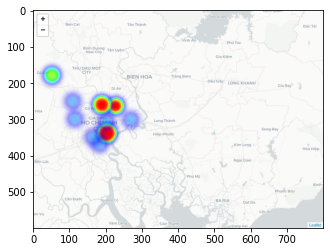

In [27]:
import cv2

img = cv2.imread("heatmap.png")
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# Download (nếu muốn)

In [ ]:
from google.colab import files
files.download('heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>